In [1]:
from sklearn.datasets import load_breast_cancer

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

Splitting Train and Test datasets

In [19]:
X, y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [33]:
from sklearn.tree import DecisionTreeClassifier
trees=DecisionTreeClassifier(random_state=101)

In [34]:
trees.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [35]:
predictions_train= trees.predict(X_train)

In [36]:
predictions_test= trees.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

print((accuracy_score(y_train,predictions_train)),(accuracy_score(y_test,predictions_test)))

1.0 0.9210526315789473


We can see that its case of complete impure split and also case of Overfitting.. 

<Figure size 1080x720 with 0 Axes>

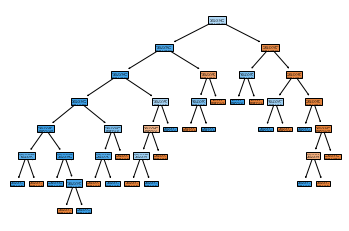

<Figure size 1080x720 with 0 Axes>

In [39]:
from sklearn import tree
tree.plot_tree(trees,filled=True)
plt.figure(figsize=(15,10))

We see this is an imbalanced Tree. 

In [28]:
import sklearn
sklearn.__version__

'0.23.2'

Cost Complexity Pruning Path --> working on the overfitting

In [41]:
path = trees.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00218063, 0.00218243, 0.0029304 , 0.0029304 ,
       0.0032967 , 0.00334903, 0.00395604, 0.00430424, 0.00444471,
       0.00550447, 0.00659341, 0.00727495, 0.00769231, 0.01742278,
       0.04734627, 0.32620664])

In [46]:
trees=DecisionTreeClassifier(ccp_alpha=0.02,random_state=45)
trees.fit(X_train,y_train)

pred_train=trees.predict(X_train)
pred_test=trees.predict(X_test)

print((accuracy_score(y_train,pred_train)),(accuracy_score(y_test,pred_test)))

0.9494505494505494 0.9473684210526315


Checking for the best ccp_alpha value for hyperparameters. 

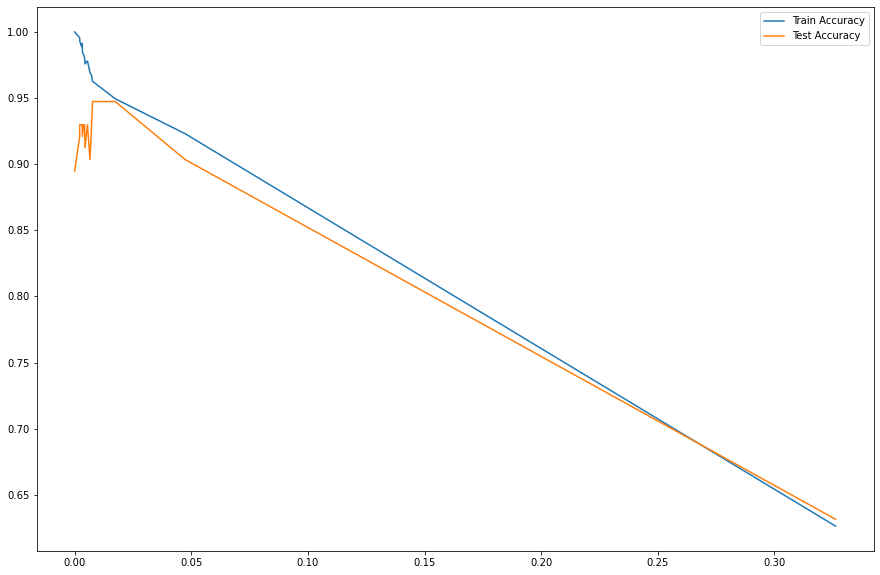

In [59]:
from sklearn.tree import DecisionTreeClassifier
accuracy_train,accuracy_test=[],[]

for i in alphas:
    trees=DecisionTreeClassifier(ccp_alpha=i)
    
    trees.fit(X_train,y_train)
    
    pred_train=trees.predict(X_train)
    pred_test=trees.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,pred_train))
    accuracy_test.append(accuracy_score(y_test,pred_test))
    

plt.figure(figsize=(15,10))

sns.lineplot(y=accuracy_train,x=alphas,label='Train Accuracy')
sns.lineplot(y=accuracy_test,x=alphas,label='Test Accuracy')

plt.show()

<Figure size 1080x720 with 0 Axes>

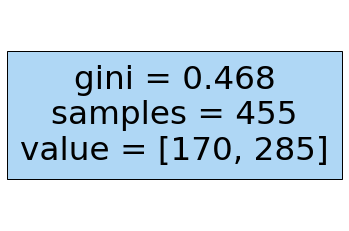

<Figure size 1080x720 with 0 Axes>

In [56]:
from sklearn import tree
tree.plot_tree(trees,filled=True)
plt.figure(figsize=(15,10))